In [1]:
# ok now that we have some sort of a baseline model i'm going to write a c

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('.\\training.csv', index_col='Client')
real_data = pd.read_csv('.\\test.csv', index_col='Client')

In [3]:
# setup for results dataframe
indexes =real_data.index
results_dict = {'Client': indexes}

# Create X features subset from dataframe
X = df.iloc[:, 8:]
# All y columns that model will be tested on
revenue_columns = ['Revenue_MF', 'Revenue_CC' ,'Revenue_CL']


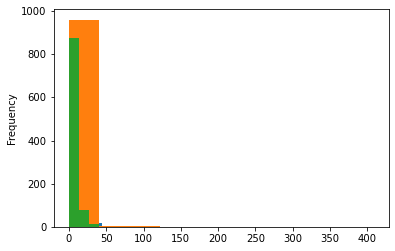

In [5]:
# Check distro of labels for each catagory
for column in revenue_columns:
    y = df[column]
    y.plot.hist()

In [6]:
# Ok wow yeah this data is heavily skewed with the majoirty of people in the test set not yielding any revenue

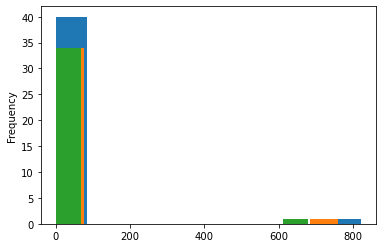

In [7]:
# Lets see if I convert these values to ints instead can i try and merge some of these values
df[revenue_columns] = df[revenue_columns].astype(np.int64)
for column in revenue_columns:
    df[column].value_counts().plot.hist()

In [8]:
# By the looks of it there are some strong outlier values who provide significant revenue but who exist an the end of the spectrum. Most people in the training set either provide you with small revenue or no revenue

In [9]:
for column in revenue_columns:
    print(column)
    print(df[column].value_counts().describe())

Revenue_MF
count     41.000000
mean      23.634146
std      127.624401
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      820.000000
Name: Revenue_MF, dtype: float64
Revenue_CC
count     35.000000
mean      27.685714
std      127.746710
min        1.000000
25%        1.000000
50%        1.000000
75%        5.500000
max      760.000000
Name: Revenue_CC, dtype: float64
Revenue_CL
count     35.000000
mean      27.685714
std      113.552986
min        1.000000
25%        2.000000
50%        7.000000
75%       15.000000
max      679.000000
Name: Revenue_CL, dtype: float64


In [ ]:
# From these description values it is as I expected, accurately predicting the revenue these people can generate its going to be really inconcise so honestly this is a major issue to fitting any sort of model to this data.abs
# In my opinion it would make sense just to give an estimate value on predicted

In [12]:

def lin_models(revenue_columns, d):
    X = d.iloc[:, 8:]
    for column in revenue_columns:
        y = d[column]
        reg = LinearRegression().fit(X, y)
        score = reg.score(X, y)
        print(score)

lin_models(revenue_columns, df)

0.037287582060594904
0.029644256658127643
0.0989388192980748


In [ ]:
# Yeah there is no hidding that this is terrible accuracy woops

In [ ]:
# I'm going to cast these revenue columns to ints to see if that improves accuracy it means that the model only needs to predict an int versus a 6 decimal point number

In [13]:
df[revenue_columns] = df[revenue_columns].astype(np.int64)
df

,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,
1094,5.138571,2,0,1,0,0,5,0,0,25,...,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0
1484,25.609107,3,1,0,1,25,0,8,0,39,...,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0
20,3.822500,2,0,1,0,0,3,0,0,27,...,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0
1193,0.000000,0,0,0,0,0,0,0,0,48,...,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0
142,0.000000,0,0,0,0,0,0,0,1,27,...,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,3.317500,3,0,0,1,0,0,3,1,63,...,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0
905,13.166786,3,1,1,1,1,0,13,0,37,...,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0
938,7.812143,3,0,1,1,0,4,7,0,57,...,470.528571,470.528571,85.714286,221.528571,163.285714,17.0,17.0,2.0,9.0,6.0


In [14]:
lin_models(revenue_columns, df)

0.037287582060594904
0.029644256658127643
0.0989388192980748


In [ ]:
# I'm not sure if I just blatantly have a mistake here but no change in prediction

In [ ]:
# Calculate maxiumum possible revenue
df['topValue'] = df[revenue_columns].max(axis=1)
df['topValue'].nlargest(100).sum()


In [ ]:
df['topValue'].nlargest(20).sum()

In [ ]:
top_earners_index = df['topValue'].nlargest(100).index
top_20_earners = df.loc[top_earners]
top_20_earners['Catagory_Label'].value_counts()

In [ ]:
# Mutual fund customers account for 70% of the top 20 earners (which subsequently makes up over half the maximum revenue potential from the labelled data)

In [ ]:
# As it currently stands I cannot predict the top 20 values for revenue because they are just outliers for the most part and the prediction model is forced to assume 0 is the most likely number

In [ ]:
# hist of top values in data
df['topValue'].plot.hist()

In [ ]:
# Ok wow so yeah there is a few hard outliers which for a linear model in this scenario are unpredictable for this scale of data
# Something to look at when refining your model an EDA definetly 

In [ ]:
df[revenue_columns] = df[revenue_columns].astype(np.int64)
df

In [ ]:
lin_models(revenue_columns, df)

In [ ]:
results_df = pd.DataFrame(data = results_dict)
results_df.set_index('Client', inplace = True)

In [ ]:
results_df